In [1]:
import glob
import scipy.io
import datetime
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
% matplotlib inline

In [2]:
SName = sorted(glob.glob('../../_data/MAT files/vosaline_by_month/vosaline*mat'))

In [3]:
## Loops
#vosaline = np.zeros([50, 800, 544])
#for time in range(144):
#    vosaline += scipy.io.loadmat(SName[time])['vosaline'][:]
#vosaline = vosaline/144.0

In [4]:
#save_var = { 'vosaline_mean': vosaline}
#scipy.io.savemat('../../_data/MAT files/FWC/vosaline_mean.mat', mdict=save_var)

In [5]:
MAT = scipy.io.loadmat('../../_data/MAT files/FWC/vosaline_mean.mat')
vosaline = MAT['vosaline_mean'][:]

In [8]:
coordinate_name=glob.glob('/ocean/yingkai/GEOTRACES/NEMO-CODE/NEMOGCM/CONFIG/ANHA4_OFF/EXP00/mesh_zgr.nc')
coordinate_obj=nc.Dataset(coordinate_name[0])
nav_lon = coordinate_obj.variables['nav_lon'][:]
nav_lat = coordinate_obj.variables['nav_lat'][:]
deptht = coordinate_obj.variables['nav_lev'][:]

In [18]:
haloc = np.zeros([800, 544])
haloc_ind = np.zeros([800, 544])
for i in range(800):
    for j in range(544):
        saline_grad = np.gradient(vosaline[:, i, j])
        haloc_ind[i, j] = np.argmax(saline_grad)
        haloc[i, j] = deptht[haloc_ind[i, j]] 

/home/yingkai/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [27]:
#haloc[haloc>1000]=np.nan
lev = np.array([0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650])

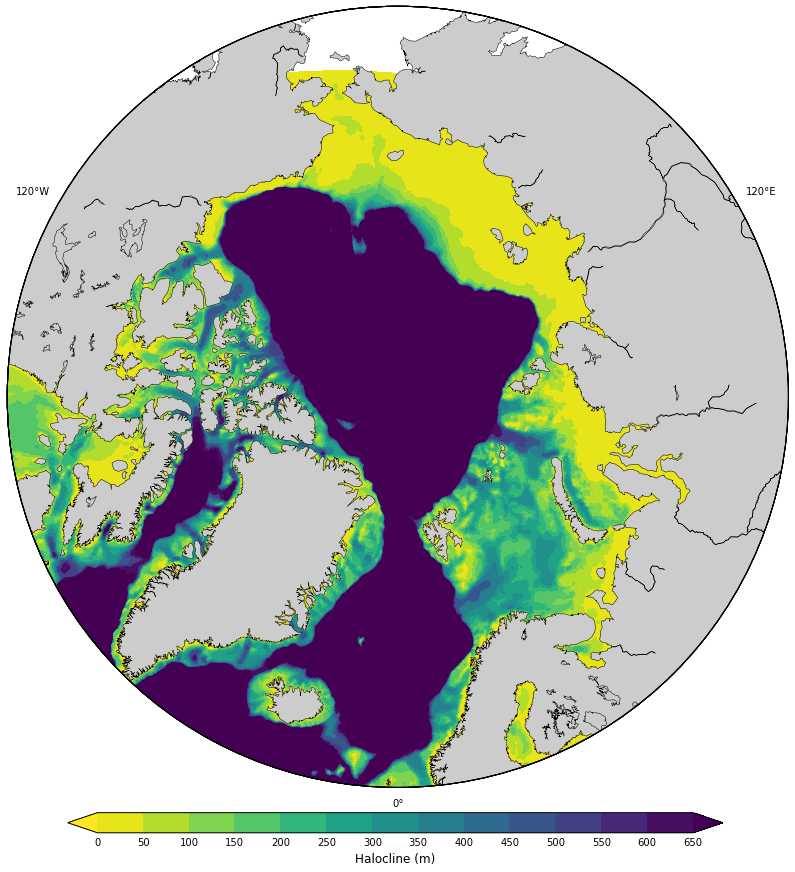

In [28]:
fig=plt.figure(figsize=(14, 14))
ax = fig.gca()
proj=Basemap(projection='npstere', resolution='l', boundinglat=60, lon_0=0, round=True, ax=ax)
proj.drawmeridians(np.arange(0, 360, 120), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
proj.fillcontinents(color='0.8', lake_color=None)
proj.drawcoastlines(linewidth=0.5, color='k')
x, y = proj(nav_lon, nav_lat)
CS = proj.contourf(x, y, haloc, lev, cmap=plt.cm.viridis_r, extend='both')
    
cax  = fig.add_axes([0.185, 0.08, 0.65, 0.02])
CBar = fig.colorbar(CS, cax=cax, orientation='horizontal')
CBar.set_label('Halocline (m)', fontsize=12)
CBar.ax.tick_params(axis='x', length=0, direction='in')
CBar.set_ticks(lev)
    
    
    